In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import supervision as sv
from tqdm.notebook import tqdm

from utils.soccer import SoccerPitchConfiguration
from utils.soccer_annotator import draw_pitch, draw_points_on_pitch, draw_paths_on_pitch

In [11]:
tracker_file_path = "dataset/kaggle_test/test_6/test_6_tracking_data.txt"

src_video_path = 'dataset/kaggle_test/test_6/test_6_src.mp4'
prj_video_path = 'dataset/kaggle_test/test_6/test_6_final.mp4'
control_area_video_path = 'dataset/kaggle_test/test_6/test_6_control_area.mp4'
trajectory_video_path = 'dataset/kaggle_test/test_6/test_6_trajectory.mp4'

video_info=sv.VideoInfo.from_video_path(src_video_path)
target_height = video_info.height
target_width = video_info.width
print(video_info)

VideoInfo(width=1920, height=1080, fps=25, total_frames=750)


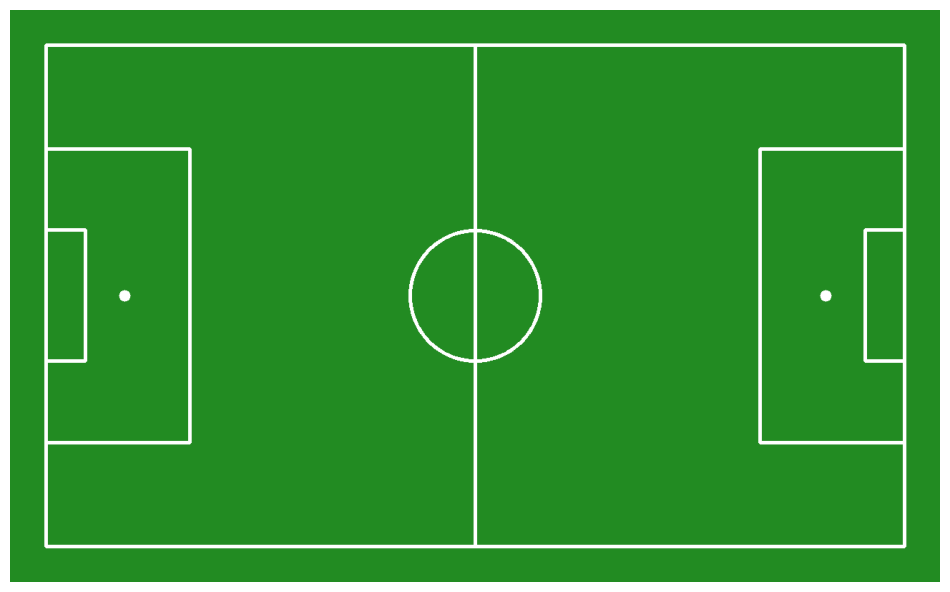

In [12]:
CONFIG=SoccerPitchConfiguration()
annotated_frame=draw_pitch(CONFIG)
sv.plot_image(annotated_frame)

In [13]:
def project_2d(file_path, video_path, show_control=False):
    video_sink=sv.VideoSink(video_path,video_info=video_info)

    count=0
    with video_sink, open(file_path, 'r') as file:
        for line in file:
            count+=1
            objects = line.strip().split(',')
            detections = [np.array(obj.split(), dtype=np.float32) for obj in objects if obj.strip() and len(obj.split()) == 4]

            ball_detections, player1_detections, player2_detections, referee_detections, keeper1_detections, keeper2_detections = (
                [arr for arr in detections if arr[2] == 0], 
                [arr for arr in detections if arr[2] == 1],
                [arr for arr in detections if arr[2] == 2], 
                [arr for arr in detections if arr[2] == 3],
                [arr for arr in detections if arr[2] == 4], 
                [arr for arr in detections if arr[2] == 5]
            )

            annotated_frame=draw_pitch(config=CONFIG)

            annotated_frame = draw_points_on_pitch(
                config=CONFIG,
                xy=[arr[:2] for arr in player1_detections],
                face_color=sv.Color.from_hex('#1E90FF'),
                edge_color=sv.Color.BLACK,
                radius=16,
                control_radius=120,
                show_area = show_control,
                pitch=annotated_frame
            )
            annotated_frame = draw_points_on_pitch(
                config=CONFIG,
                xy=[arr[:2] for arr in player2_detections],
                face_color=sv.Color.from_hex('#FF69B4'),
                edge_color=sv.Color.BLACK,
                radius=16,
                control_radius=120,
                show_area = show_control,
                pitch=annotated_frame
            )
            annotated_frame = draw_points_on_pitch(
                config=CONFIG,
                xy=[arr[:2] for arr in keeper1_detections],
                face_color=sv.Color.from_hex('#00008B'),
                edge_color=sv.Color.BLACK,
                radius=16,
                control_radius=120,
                show_area = show_control,
                pitch=annotated_frame
            )
            annotated_frame = draw_points_on_pitch(
                config=CONFIG,
                xy=[arr[:2] for arr in keeper2_detections],
                face_color=sv.Color.from_hex('#8B008B'),
                edge_color=sv.Color.BLACK,
                radius=16,
                control_radius=120,
                show_area = show_control,
                pitch=annotated_frame
            )
            annotated_frame = draw_points_on_pitch(
                config=CONFIG,
                xy=[arr[:2] for arr in ball_detections],
                face_color=sv.Color.WHITE,
                edge_color=sv.Color.BLACK,
                radius=10,
                pitch=annotated_frame
            )
            annotated_frame = draw_points_on_pitch(
                config=CONFIG,
                xy=[arr[:2] for arr in referee_detections],
                face_color=sv.Color.from_hex("FFD700"),
                edge_color=sv.Color.BLACK,
                radius=12,
                pitch=annotated_frame
            )

            resized_annotated_frame = cv2.resize(annotated_frame, (target_width, target_height))
            video_sink.write_frame(frame=resized_annotated_frame)
            print(f"Done for frame {count}")

In [14]:
project_2d(tracker_file_path, prj_video_path, show_control=False)

Done for frame 1
Done for frame 2
Done for frame 3
Done for frame 4
Done for frame 5
Done for frame 6
Done for frame 7
Done for frame 8
Done for frame 9
Done for frame 10
Done for frame 11
Done for frame 12
Done for frame 13
Done for frame 14
Done for frame 15
Done for frame 16
Done for frame 17
Done for frame 18
Done for frame 19
Done for frame 20
Done for frame 21
Done for frame 22
Done for frame 23
Done for frame 24
Done for frame 25
Done for frame 26
Done for frame 27
Done for frame 28
Done for frame 29
Done for frame 30
Done for frame 31
Done for frame 32
Done for frame 33
Done for frame 34
Done for frame 35
Done for frame 36
Done for frame 37
Done for frame 38
Done for frame 39
Done for frame 40
Done for frame 41
Done for frame 42
Done for frame 43
Done for frame 44
Done for frame 45
Done for frame 46
Done for frame 47
Done for frame 48
Done for frame 49
Done for frame 50
Done for frame 51
Done for frame 52
Done for frame 53
Done for frame 54
Done for frame 55
Done for frame 56
D

In [15]:
project_2d(tracker_file_path, control_area_video_path, show_control=True)

Done for frame 1
Done for frame 2
Done for frame 3
Done for frame 4
Done for frame 5
Done for frame 6
Done for frame 7
Done for frame 8
Done for frame 9
Done for frame 10
Done for frame 11
Done for frame 12
Done for frame 13
Done for frame 14
Done for frame 15
Done for frame 16
Done for frame 17
Done for frame 18
Done for frame 19
Done for frame 20
Done for frame 21
Done for frame 22
Done for frame 23
Done for frame 24
Done for frame 25
Done for frame 26
Done for frame 27
Done for frame 28
Done for frame 29
Done for frame 30
Done for frame 31
Done for frame 32
Done for frame 33
Done for frame 34
Done for frame 35
Done for frame 36
Done for frame 37
Done for frame 38
Done for frame 39
Done for frame 40
Done for frame 41
Done for frame 42
Done for frame 43
Done for frame 44
Done for frame 45
Done for frame 46
Done for frame 47
Done for frame 48
Done for frame 49
Done for frame 50
Done for frame 51
Done for frame 52
Done for frame 53
Done for frame 54
Done for frame 55
Done for frame 56
D

In [16]:
def get_statistics(file_path):
    possession1_count = 0
    possession1 = True
    dist_threshold=250
    pass_dist_threshold = 500
    pass_initiated = False
    min_distances=[]
    team1_passes, team2_passes, team1_correct_passes, team2_correct_passes = 0, 0, 0, 0
    frames=0
    with open(file_path, 'r') as file:
        for line in file:
            frames+=1
            objects = line.strip().split(',')
            detections = [np.array(obj.split(), dtype=np.float32) for obj in objects if obj.strip() and len(obj.split()) == 4]

            ball_detections, player1_detections, player2_detections, referee_detections, keeper1_detections, keeper2_detections = (
                [arr for arr in detections if arr[2] == 0], 
                [arr for arr in detections if arr[2] == 1],
                [arr for arr in detections if arr[2] == 2], 
                [arr for arr in detections if arr[2] == 3],
                [arr for arr in detections if arr[2] == 4], 
                [arr for arr in detections if arr[2] == 5]
            )

            if ball_detections:
                ball = ball_detections[0]  # Take the first ball detection
                candidates = player1_detections + player2_detections + keeper1_detections + keeper2_detections
                
                if candidates:
                    distances = [np.linalg.norm(ball[:2] - candidate[:2]) for candidate in candidates]    
                    closest_idx, min_dist = np.argmin(distances), np.min(distances)
                    closest_object = candidates[closest_idx]
                    min_distances.append(min_dist)

                    if min_dist<dist_threshold:
                        if closest_object[2]==1 or closest_object[2]==4:
                            new_possession1 = True
                        else:
                            new_possession1 = False
                            
                        if pass_initiated:
                            pass_initiated = False
                            if new_possession1 and possession1:
                                team1_correct_passes += 1
                            if not (new_possession1 or possession1):
                                team2_correct_passes += 1
                                
                        possession1 = new_possession1
                            
                    if min_dist > pass_dist_threshold and not (pass_initiated):
                        pass_initiated = True
                        if possession1:
                            team1_passes+=1
                        else:
                            team2_passes+=1
            else:
                min_distances.append(-1)
            if possession1:
                possession1_count+=1
                # print(frames,min_dist)
                # frame_generator = sv.get_video_frames_generator(prj_video_path)
                # ith_frame = next(frame for idx, frame in enumerate(frame_generator) if idx == frames-1)
                # sv.plot_image(ith_frame)
    return min_distances, possession1_count, frames, team1_passes, team2_passes, team1_correct_passes, team2_correct_passes

min_distances, possession1_count, total_frames, team1_passes, team2_passes, team1_correct_passes, team2_correct_passes = get_statistics(tracker_file_path)
print(f"Team 1 possession - {100*possession1_count/total_frames :.2f}%, Team 2 possession - {100 - 100*possession1_count/total_frames :.2f}%")
print(f"Team 1 passes: {team1_passes}")
if team1_passes!=0:
    print(f"Team 1 pass accuracy: {100*team1_correct_passes/team1_passes :.2f}%")
print(f"Team 2 passes: {team2_passes}")
if team2_passes!=0:
    print(f"Team 2 pass accuracy: {100*team2_correct_passes/team2_passes :.2f}%")

Team 1 possession - 56.13%, Team 2 possession - 43.87%
Team 1 passes: 7
Team 1 pass accuracy: 71.43%
Team 2 passes: 4
Team 2 pass accuracy: 25.00%


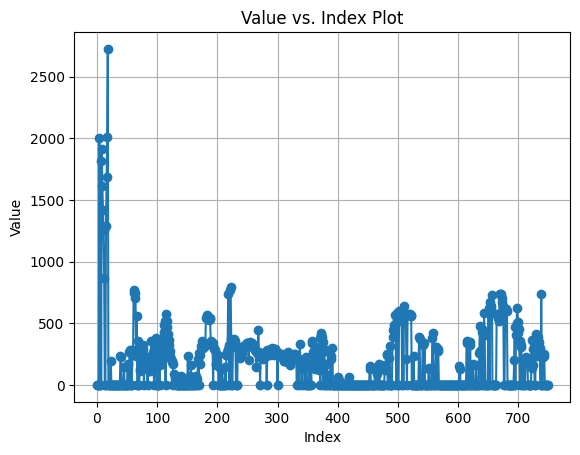

In [17]:
import matplotlib.pyplot as plt
plt.plot(min_distances, marker='o', linestyle='-')  # 'o' for points, '-' for line
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Value vs. Index Plot")
plt.grid(True)
plt.show()

In [18]:
from collections import deque

def get_ball_trajectory(file_path, video_path, show_control):
    maxlength = 500
    ball_path = deque(maxlen=maxlength)
    frames=0
    video_sink=sv.VideoSink(video_path,video_info=video_info)
    
    with video_sink, open(file_path, 'r') as file:
        for line in file:
            frames+=1
            objects = line.strip().split(',')
            detections = [np.array(obj.split(), dtype=np.float32) for obj in objects if obj.strip() and len(obj.split()) == 4]

            ball_detections, player1_detections, player2_detections, referee_detections, keeper1_detections, keeper2_detections = (
                [arr for arr in detections if arr[2] == 0], 
                [arr for arr in detections if arr[2] == 1],
                [arr for arr in detections if arr[2] == 2], 
                [arr for arr in detections if arr[2] == 3],
                [arr for arr in detections if arr[2] == 4], 
                [arr for arr in detections if arr[2] == 5]
            )

            if ball_detections:
                ball = ball_detections[0]
                ball_path.append(ball[:2])
                
            annotated_frame=draw_pitch(config=CONFIG)

            annotated_frame = draw_points_on_pitch(
                config=CONFIG,
                xy=[arr[:2] for arr in player1_detections],
                face_color=sv.Color.from_hex('#1E90FF'),
                edge_color=sv.Color.BLACK,
                radius=16,
                control_radius=120,
                padding=30,
                show_area = show_control,
                pitch=annotated_frame
            )
            annotated_frame = draw_points_on_pitch(
                config=CONFIG,
                xy=[arr[:2] for arr in player2_detections],
                face_color=sv.Color.from_hex('#FF69B4'),
                edge_color=sv.Color.BLACK,
                radius=16,
                control_radius=120,
                padding=30,
                show_area = show_control,
                pitch=annotated_frame
            )
            annotated_frame = draw_points_on_pitch(
                config=CONFIG,
                xy=[arr[:2] for arr in keeper1_detections],
                face_color=sv.Color.from_hex('#00008B'),
                edge_color=sv.Color.BLACK,
                radius=16,
                control_radius=120,
                padding=30,
                show_area = show_control,
                pitch=annotated_frame
            )
            annotated_frame = draw_points_on_pitch(
                config=CONFIG,
                xy=[arr[:2] for arr in keeper2_detections],
                face_color=sv.Color.from_hex('#8B008B'),
                edge_color=sv.Color.BLACK,
                radius=16,
                control_radius=120,
                padding=30,
                show_area = show_control,
                pitch=annotated_frame
            )
            annotated_frame = draw_points_on_pitch(
                config=CONFIG,
                xy=[arr[:2] for arr in ball_detections],
                face_color=sv.Color.WHITE,
                edge_color=sv.Color.BLACK,
                radius=10,
                padding=30,
                pitch=annotated_frame
            )
            annotated_frame = draw_points_on_pitch(
                config=CONFIG,
                xy=[arr[:2] for arr in referee_detections],
                face_color=sv.Color.from_hex("FFD700"),
                edge_color=sv.Color.BLACK,
                radius=12,
                padding=30,
                pitch=annotated_frame
            )

            annotated_frame = draw_paths_on_pitch(
                config=CONFIG,
                paths=ball_path,
                maxlen = maxlength,
                padding = 30,
                thickness = 10,
                threshold_distance=30,
                pitch = annotated_frame
            )

            resized_annotated_frame = cv2.resize(annotated_frame, (target_width, target_height))
            video_sink.write_frame(frame=resized_annotated_frame)
            print(f"Done for frame {frames}")
            
get_ball_trajectory(tracker_file_path, trajectory_video_path, False)

Done for frame 1
Done for frame 2
Done for frame 3
Done for frame 4
Done for frame 5
Done for frame 6
Done for frame 7
Done for frame 8
Done for frame 9
Done for frame 10
Done for frame 11
Done for frame 12
Done for frame 13
Done for frame 14
Done for frame 15
Done for frame 16
Done for frame 17
Done for frame 18
Done for frame 19
Done for frame 20
Done for frame 21
Done for frame 22
Done for frame 23
Done for frame 24
Done for frame 25
Done for frame 26
Done for frame 27
Done for frame 28
Done for frame 29
Done for frame 30
Done for frame 31
Done for frame 32
Done for frame 33
Done for frame 34
Done for frame 35
Done for frame 36
Done for frame 37
Done for frame 38
Done for frame 39
Done for frame 40
Done for frame 41
Done for frame 42
Done for frame 43
Done for frame 44
Done for frame 45
Done for frame 46
Done for frame 47
Done for frame 48
Done for frame 49
Done for frame 50
Done for frame 51
Done for frame 52
Done for frame 53
Done for frame 54
Done for frame 55
Done for frame 56
D